In [1]:
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Load data from JSON file
with open("aligned_data.json", "r") as file:
    data = json.load(file)

# Extract features from the data
dates = list(data.keys())
open_prices = [float(data[date]["Open Price"]) for date in dates]
high_prices = [float(data[date]["High Price"]) for date in dates]
low_prices = [float(data[date]["Low Price"]) for date in dates]
close_prices = [float(data[date]["Close Price"]) for date in dates]
ticker_sentiment_scores = [float(data[date]["Ticker Sentiment Score"]) for date in dates]
overall_sentiment_scores = [float(data[date]["Overall Sentiment Score"]) for date in dates]
ticker_sentiment_labels = [data[date]["Ticker Sentiment Label"] for date in dates]
overall_sentiment_labels = [data[date]["Overall Sentiment Label"] for date in dates]

print(dates)

['2023-06-20', '2023-06-16', '2023-06-15', '2023-06-14', '2023-06-12', '2023-06-09', '2023-06-08', '2023-06-07', '2023-06-06', '2023-06-05', '2023-06-02', '2023-06-01', '2023-05-31', '2023-05-30', '2023-05-26', '2023-05-25', '2023-05-23', '2023-05-22', '2023-05-19', '2023-05-18', '2023-05-17', '2023-05-16', '2023-05-15', '2023-05-12', '2023-05-11', '2023-05-10', '2023-05-09', '2023-05-08', '2023-05-05', '2023-05-02', '2023-04-28', '2023-04-27', '2023-04-26', '2023-04-25', '2023-04-24', '2023-04-20', '2023-04-19', '2023-04-18', '2023-04-17', '2023-04-14', '2023-04-13', '2023-04-12', '2023-04-11', '2023-04-10', '2023-04-06', '2023-04-05', '2023-04-04', '2023-04-03', '2023-03-31', '2023-03-30', '2023-03-29', '2023-03-28', '2023-03-27', '2023-03-24', '2023-03-21', '2023-03-20', '2023-03-16', '2023-03-15', '2023-03-14', '2023-03-13', '2023-03-10', '2023-03-09', '2023-03-08', '2023-03-07', '2023-03-06', '2023-03-03', '2023-03-02', '2023-03-01', '2023-02-28', '2023-02-27', '2023-02-24', '2023

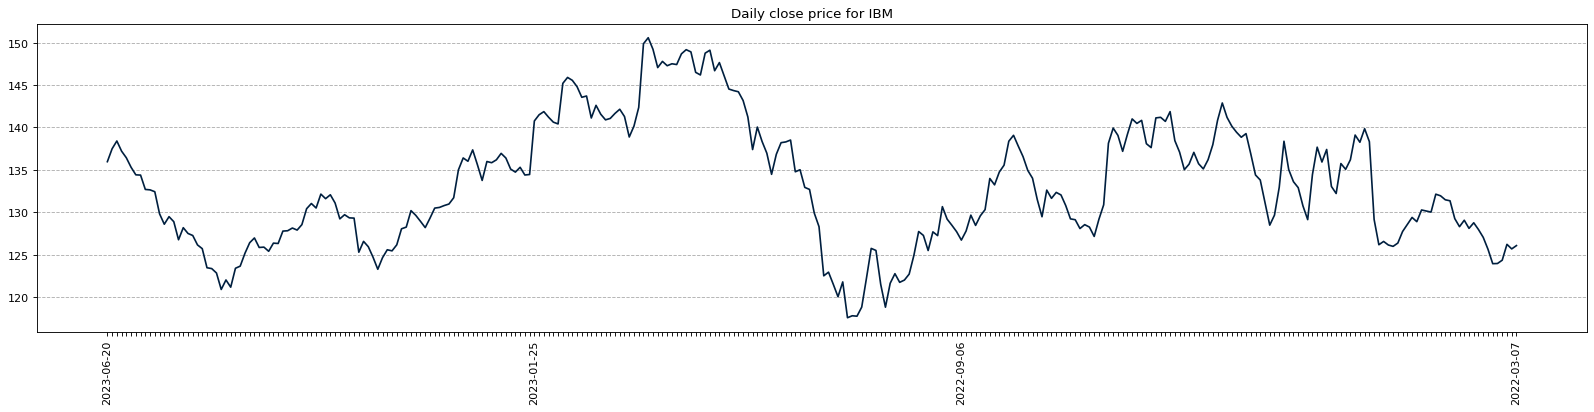

In [2]:
from matplotlib.pyplot import figure
data_date = dates
num_data_points = len(dates)
data_close_price = close_prices

config = { 
    "plots": {
        "xticks_interval": 90, # show a date every 90 days
        "color_actual": "#001f3f",
        "color_train": "#3D9970",
        "color_val": "#0074D9",
        "color_pred_train": "#3D9970",
        "color_pred_val": "#0074D9",
        "color_pred_test": "#FF4136",
    }
}
# plot

fig = figure(figsize=(25, 5), dpi=80)
fig.patch.set_facecolor((1.0, 1.0, 1.0))
plt.plot(data_date, data_close_price, color=config["plots"]["color_actual"])
xticks = [data_date[i] if ((i%config["plots"]["xticks_interval"]==0 and (num_data_points-i) > config["plots"]["xticks_interval"]) or i==num_data_points-1) else None for i in range(num_data_points)] # make x ticks nice
x = np.arange(0,len(xticks))
plt.xticks(x, xticks, rotation='vertical')
plt.title("Daily close price for IBM")
plt.grid(visible=None, which='major', axis='y', linestyle='--')
plt.show()

In [3]:
from sklearn.preprocessing import MinMaxScaler

# Perform min-max normalization for the remaining numerical features
scaler = MinMaxScaler()

normalized_open_prices = scaler.fit_transform([[price] for price in open_prices])
normalized_open_prices = [price[0] for price in normalized_open_prices]

normalized_high_prices = scaler.fit_transform([[price] for price in high_prices])
normalized_high_prices = [price[0] for price in normalized_high_prices]

normalized_low_prices = scaler.fit_transform([[price] for price in low_prices])
normalized_low_prices = [price[0] for price in normalized_low_prices]

normalized_close_prices = scaler.fit_transform([[price] for price in close_prices])
normalized_close_prices = [price[0] for price in normalized_close_prices]

normalized_ticker_sentiment_scores = scaler.fit_transform([[score] for score in ticker_sentiment_scores])
normalized_ticker_sentiment_scores = [score[0] for score in normalized_ticker_sentiment_scores]

normalized_overall_sentiment_scores = scaler.fit_transform([[score] for score in overall_sentiment_scores])
normalized_overall_sentiment_scores = [score[0] for score in normalized_overall_sentiment_scores]

print(normalized_close_prices)


[0.5572727272727276, 0.6033333333333335, 0.6312121212121218, 0.5948484848484847, 0.5712121212121213, 0.537272727272728, 0.5103030303030307, 0.5093939393939397, 0.458181818181818, 0.456666666666667, 0.4500000000000002, 0.3712121212121211, 0.3339393939393944, 0.36090909090909085, 0.3430303030303028, 0.2784848484848488, 0.3215151515151522, 0.30090909090909124, 0.2936363636363639, 0.2600000000000007, 0.2466666666666666, 0.1784848484848487, 0.17545454545454575, 0.15969696969697011, 0.1009090909090915, 0.13484848484848522, 0.10909090909090935, 0.1766666666666672, 0.18424242424242454, 0.23000000000000043, 0.26787878787878805, 0.28484848484848513, 0.25090909090909097, 0.2521212121212124, 0.23727272727272775, 0.2663636363636366, 0.26515151515151514, 0.30939393939393955, 0.31060606060606055, 0.3203030303030303, 0.31303030303030344, 0.3324242424242425, 0.3893939393939392, 0.4078787878787882, 0.39181818181818207, 0.4415151515151514, 0.4251515151515153, 0.4390909090909094, 0.4096969696969701, 0.353

In [4]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical sentiment labels
label_encoder = LabelEncoder()

encoded_ticker_sentiment_labels = label_encoder.fit_transform(ticker_sentiment_labels)
encoded_overall_sentiment_labels = label_encoder.fit_transform(overall_sentiment_labels)

print(encoded_overall_sentiment_labels)

[4 4 2 1 1 4 1 4 4 4 2 4 4 4 1 2 4 4 4 2 2 2 4 4 2 4 4 4 2 2 2 4 2 4 4 4 2
 1 3 4 1 2 2 2 4 4 1 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 2 2 4 4 4 4 2 4 2 4 4 4
 2 2 2 4 2 2 4 2 4 4 1 2 4 2 2 2 2 1 4 4 2 4 2 4 4 4 4 4 2 1 2 4 4 2 4 4 4
 4 4 4 1 4 4 2 2 2 4 4 2 4 4 4 4 1 2 4 4 4 4 4 1 2 2 4 4 4 2 2 4 2 4 4 4 2
 4 2 2 2 2 2 4 4 1 4 4 4 2 4 2 4 4 4 4 4 4 4 2 4 4 4 4 4 4 1 4 2 4 2 4 4 2
 4 4 4 3 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 2 4 2 2 2 4 4 2 4 4 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 0 0 2 0 2 2 2 0 0 3 3 3 2 4 2 2 2 2 2 3
 2 2 2 3 0 2 2 1 0 0 4 2 2 0 3 3 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 1 2 2 2 2
 2 2]


In [5]:
sequence_length = 15  # Define the sequence length

input_sequences = []  # List to store input sequences
output_labels = []  # List to store output labels

# Generate input-output sequences
for i in range(len(normalized_close_prices) - sequence_length):
    input_sequence = [
        normalized_open_prices[i : i + sequence_length],
        normalized_high_prices[i : i + sequence_length],
        normalized_low_prices[i : i + sequence_length],
        normalized_ticker_sentiment_scores[i : i + sequence_length],
        normalized_overall_sentiment_scores[i : i + sequence_length],
        encoded_ticker_sentiment_labels[i : i + sequence_length],
        encoded_overall_sentiment_labels[i : i + sequence_length]
    ]
    output_label = normalized_close_prices[i + sequence_length]

    input_sequences.append(input_sequence)
    output_labels.append(output_label)

# Convert to numpy arrays
input_sequences = np.array(input_sequences)
output_labels = np.array(output_labels)

# Transpose the input sequences
input_sequences = np.transpose(input_sequences, (0, 2, 1))

# Print the shapes of the input-output sequences
print("Input sequences shape:", input_sequences.shape)
print("Output labels shape:", output_labels.shape)


Input sequences shape: (283, 15, 7)
Output labels shape: (283,)


In [6]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(input_sequences, output_labels, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shapes:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print()
print("Testing set shapes:")
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


Training set shapes:
X_train shape: (226, 15, 7)
y_train shape: (226,)

Testing set shapes:
X_test shape: (57, 15, 7)
y_test shape: (57,)


In [7]:
# # Reshape the input sequences
# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

# # Print the reshaped shapes
# print("Reshaped Training set shape:", X_train.shape)
# print("Reshaped Testing set shape:", X_test.shape)


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create data loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define the LSTM attention model
class LSTMAttentionModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(LSTMAttentionModel, self).__init__()

        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.attention = nn.Linear(hidden_dim, 1)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        lstm_output, _ = self.lstm(x)
        attention_weights = self.attention(lstm_output)
        attention_weights = self.softmax(attention_weights)
        attention_output = torch.matmul(attention_weights.transpose(1, 2), lstm_output).squeeze(-2)
        output = self.fc(attention_output)

        return output.squeeze(-1)

# Set the hyperparameters
input_dim = 7
hidden_dim = 32
output_dim = 1
learning_rate = 0.01
num_epochs = 50
batch_size = 32

# Instantiate the LSTM attention model
model = LSTMAttentionModel(input_dim, hidden_dim, output_dim)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        # Forward pass
        outputs = model(inputs)
        print("Shapes - outputs:", outputs.shape, "labels:", labels.shape)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print the loss for every epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

# Evaluation
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    outputs = outputs.squeeze(-1)
    test_loss = criterion(outputs, y_test_tensor)
    print(f"Test Loss: {test_loss.item()}")

Shapes - outputs: torch.Size([64]) labels: torch.Size([64])
Shapes - outputs: torch.Size([64]) labels: torch.Size([64])
Shapes - outputs: torch.Size([64]) labels: torch.Size([64])
Shapes - outputs: torch.Size([34]) labels: torch.Size([34])
Epoch 1/50, Loss: 0.0496341697871685
Shapes - outputs: torch.Size([64]) labels: torch.Size([64])
Shapes - outputs: torch.Size([64]) labels: torch.Size([64])
Shapes - outputs: torch.Size([64]) labels: torch.Size([64])
Shapes - outputs: torch.Size([34]) labels: torch.Size([34])
Epoch 2/50, Loss: 0.06124311313033104
Shapes - outputs: torch.Size([64]) labels: torch.Size([64])
Shapes - outputs: torch.Size([64]) labels: torch.Size([64])
Shapes - outputs: torch.Size([64]) labels: torch.Size([64])
Shapes - outputs: torch.Size([34]) labels: torch.Size([34])
Epoch 3/50, Loss: 0.06519395112991333
Shapes - outputs: torch.Size([64]) labels: torch.Size([64])
Shapes - outputs: torch.Size([64]) labels: torch.Size([64])
Shapes - outputs: torch.Size([64]) labels: torc

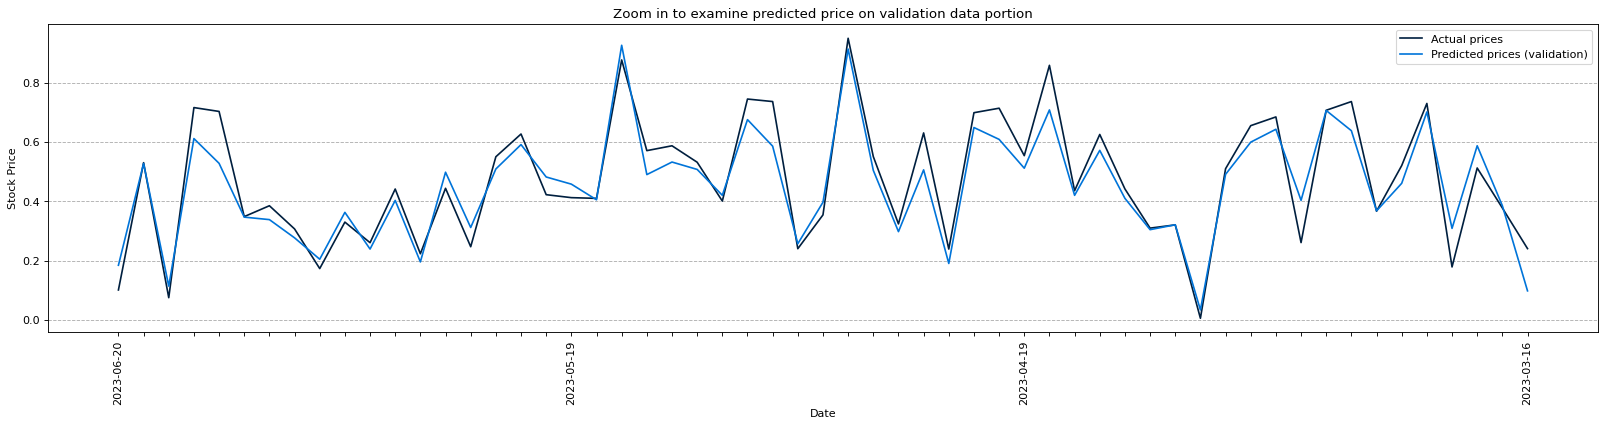

In [9]:
# Convert tensors to numpy arrays
predicted_values = outputs.squeeze().cpu().numpy()
actual_values = y_test_tensor.squeeze().cpu().numpy()
to_plot_data_date = data_date[:len(predicted_values)]

# Create the figure and axes
fig, ax = plt.subplots(figsize=(25, 5), dpi=80)
fig.patch.set_facecolor((1.0, 1.0, 1.0))

# Plot the actual and predicted prices
ax.plot(to_plot_data_date, actual_values, label="Actual prices", color=config["plots"]["color_actual"])
ax.plot(to_plot_data_date, predicted_values, label="Predicted prices (validation)", color=config["plots"]["color_pred_val"])

# Set the title and axis labels
ax.set_title("Zoom in to examine predicted price on validation data portion")
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')

# Set the x-axis ticks
xticks = [to_plot_data_date[i] if ((i % int(config["plots"]["xticks_interval"] / 5) == 0 and (len(to_plot_data_date) - i) > config["plots"]["xticks_interval"] / 6) or i == len(to_plot_data_date) - 1) else None for i in range(len(to_plot_data_date))]
xs = range(len(xticks))
ax.set_xticks(xs)
ax.set_xticklabels(xticks, rotation='vertical')

# Add a grid
ax.grid(visible=None, which='major', axis='y', linestyle='--')

# Add a legend
ax.legend()

# Display the plot
plt.show()


In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Convert tensors to numpy arrays
predicted_values = outputs.cpu().numpy()
actual_values = y_test_tensor.cpu().numpy()

# Calculate evaluation metrics
mse = mean_squared_error(actual_values, predicted_values)
rmse = mean_squared_error(actual_values, predicted_values, squared=False)
mae = mean_absolute_error(actual_values, predicted_values)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 0.004620173
Root Mean Squared Error (RMSE): 0.067971855
Mean Absolute Error (MAE): 0.05289525
